# How does SP influence Learning?

Detectin SP is interesting, but knowing that or if or how it influences down-stream learning is, I think, important to motivating why this work of building detectors is important.  

I think, but have yet to build the demonstration that SP would lead many popular feature selection algorithms to a nonideal solution.



How does sp influence classification and regression results?


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.feature_selection as feat_sel
from sklearn import linear_model

import wiggum as wg
import sp_data_util as spdata
from sp_data_util import sp_plot

In [28]:
# setup
r_clusters = -.4  # correlation coefficient of clusters
cluster_spread = .9 # pearson correlation of means
p_sp_clusters = .7 # portion of clusters with SP 
k = 5 # number of clusters
cluster_size = [4,4]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [.5, .2, .1, .1, .1]

many_sp_df = spdata.geometric_indep_views_gmm_sp(5,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters,numeric_categorical=True)
many_sp_df.head()

200
10


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,A,B,C,D,E
0,11.283617,12.266681,16.483884,18.393627,11.201581,11.385439,19.369464,15.361911,14.367625,16.524679,4,1,1,2,0
1,19.431862,19.847008,10.965344,11.932205,5.628395,4.659289,11.810595,11.765780,13.895491,12.618098,2,2,0,4,4
2,7.125373,8.031276,11.748312,14.871679,7.071572,4.565275,6.142642,5.578645,1.348359,1.048413,1,3,0,3,1
3,17.949531,19.403664,10.057368,9.671524,16.178458,13.759801,8.266322,12.447361,-1.510906,1.199429,2,2,2,1,1
4,18.590509,18.866738,8.215215,10.210943,13.319147,10.834809,16.720146,14.199072,0.145312,0.296035,2,0,1,0,1


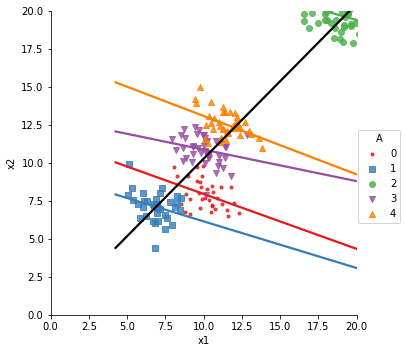

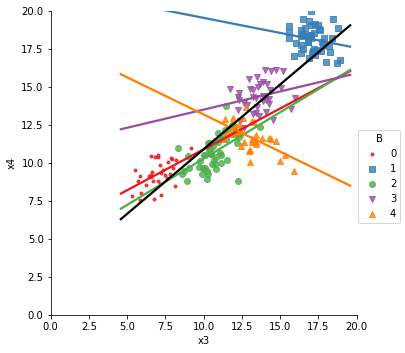

In [29]:
sp_plot(many_sp_df,'x1','x2','A')
sp_plot(many_sp_df,'x3','x4','B')

In [34]:

clf = linear_model.Lasso(alpha=0.1)
clf.fit(many_sp_df.T.loc['x4':'D'].values.T,many_sp_df['x3'].T)
[(var,c) for var, c in zip(many_sp_df.T.loc['x4':'D'].T.columns,clf.coef_)]


[('x4', 0.9126001522934704),
 ('x5', -0.0),
 ('x6', -0.004960026313026977),
 ('x7', -0.0),
 ('x8', -0.006058382370376012),
 ('x9', 0.0),
 ('x10', 0.006654409491863912),
 ('A', -0.05084543596132035),
 ('B', 0.6639032815330895),
 ('C', -0.01452596807878072),
 ('D', 0.0683478324230263)]

In [35]:

clf = linear_model.Lasso(alpha=0.1)
clf.fit(many_sp_df.T.loc['x2':'D'].values.T,many_sp_df['x1'].T)
[(var,c) for var, c in zip(many_sp_df.T.loc['x2':'D'].T.columns,clf.coef_)]


[('x2', 0.851865788068355),
 ('x3', 0.03149408694436788),
 ('x4', -0.0),
 ('x5', 0.0),
 ('x6', 0.0016313908599620843),
 ('x7', 0.0513041743389477),
 ('x8', 0.0),
 ('x9', -0.0),
 ('x10', 0.03552637547931165),
 ('A', -0.4900260873145558),
 ('B', -0.035365614577165354),
 ('C', -0.0),
 ('D', 0.08629160814061664)]

We see in the two examples above that, even with SP, the feature selection paradigm detects that the relevant categorical variable is important (high weight) to predicting the continuous variables.  

When interested in regression of one of the continuous valued varialbes in a dataset, a common choice is to throw away the categorical variables, because that's what the interface of regression is. In cases of Simpson's Paradox, this is obviously a risky choice.  

If there's a lot of dimensions in the continuous features, categorical variables might be dropped for the simple reason that popular ML toolkits don't allow categorical variables to be used in feature selection.  This can result in throwing away important information.

In [7]:
if x is None:
    print("yes")

NameError: name 'x' is not defined